Digital Signal Processing Training

# Fast Fourier Transform

In [1]:
import numpy as np

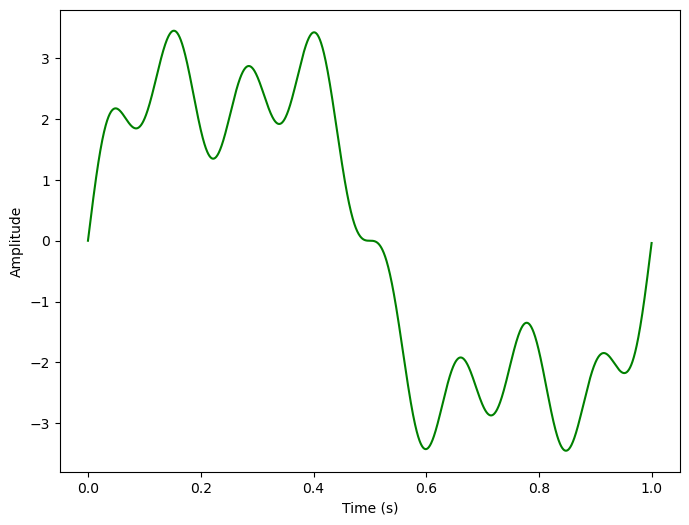

In [49]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1
x = 3*np.sin(2*np.pi*freq*t)

freq = 3
x += np.sin(2*np.pi*freq*t)

freq = 8   
x += 0.75* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'g')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')

plt.show()

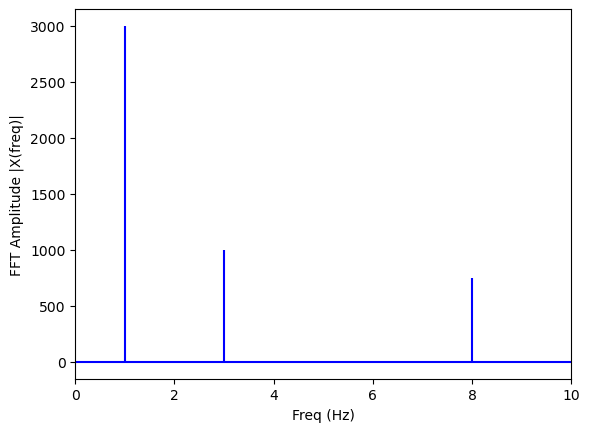

In [50]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)
plt.show()

# Properties of the Fourier Transform

In [110]:
def ft(samples, Fs, t0):
    """Approximate the Fourier Transform of a time-limited signal 
    by means of the discrete Fourier Transform.
    
    samples: signal values sampled at the positions t0 + n/Fs
    Fs: Sampling frequency of the signal
    t0: starting time of the sampling of the signal
    """
    f = np.linspace(-Fs/2, Fs/2, len(samples), endpoint=False)
    return np.fft.fftshift(np.fft.fft(samples)/Fs * np.exp(-2j*np.pi*f*t0))

# Linearity

In [125]:
def rect(t):
    return (abs(t) <= 0.5).astype(float)
def gauss(t):
    return np.exp(-t*t)
def triang(t):
    return (1-abs(t)) * rect(t/2)


tstart = 10
t0=10
Fs = 1000
t = np.arange(-tstart, tstart, 1/Fs)
f = np.arange(-Fs/2, Fs/2, Fs/len(t))

x = rect
y = gauss
X = ft(x(t), Fs, -tstart)
Y = ft(y(t), Fs, -tstart)

def showLinearity(a):
    plt.figure(figsize=(10,6))
    plt.subplot(221)
    plt.plot(t, x(t), label='$x(t)$')
    plt.plot(t, y(t), label='$y(t)$')
    plt.legend()

    plt.subplot(222)
    plt.plot(f, X.real, label='$X(f)$')
    plt.plot(f, Y.real, label='$Y(f)$')
    plt.xlim(-3, 3)
    plt.legend()
    
    xplusay = lambda t: x(t) + a*y(t)
    XplusaY = ft(xplusay(t), Fs, -t0)
    plt.subplot(223)
    plt.plot(t, xplusay(t), '-*', label='$x(t)+ay(t)$', markevery=400)
    plt.plot(t, x(t), label='$x(t)$')
    plt.plot(t, a*y(t), label='$ay(t)$')
    plt.legend()
    
    plt.subplot(224)
    plt.plot(f, XplusaY.real, '-*', label='$X(f)+aY(f)$', markevery=10)
    plt.plot(f, X.real, label='$X(f)$')
    plt.plot(f, a*Y.real, label='$aY(f)$')
    plt.xlim(-3, 3)
    plt.legend()

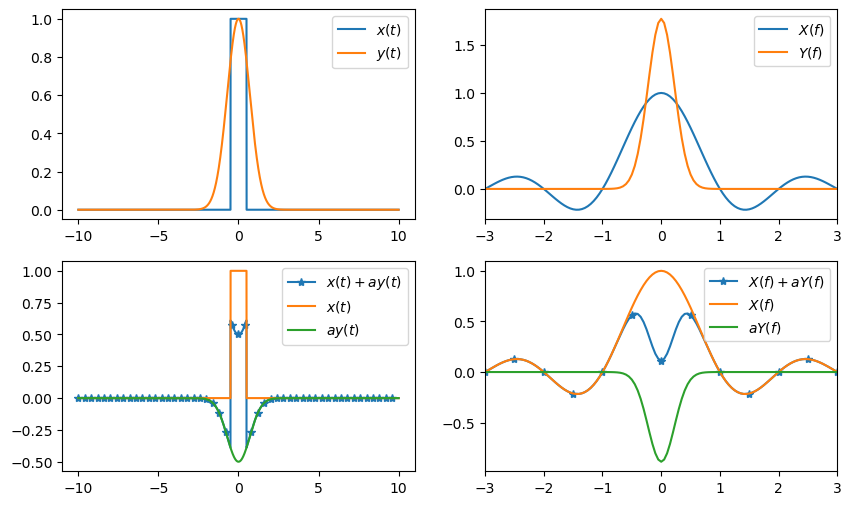

In [126]:
showLinearity(-.5)

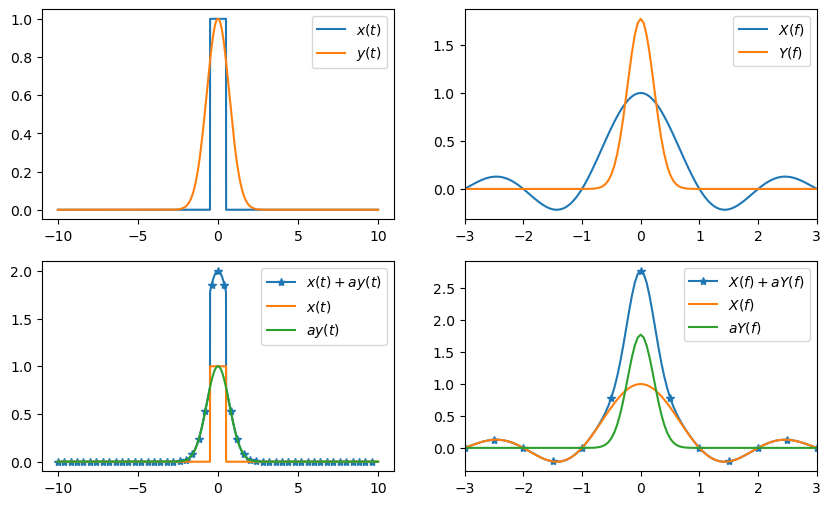

In [127]:
showLinearity(1)

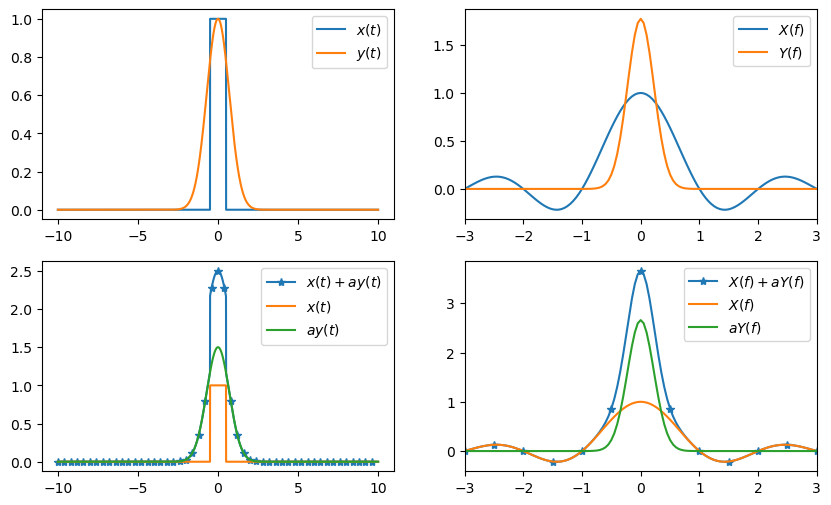

In [128]:
showLinearity(1.5)

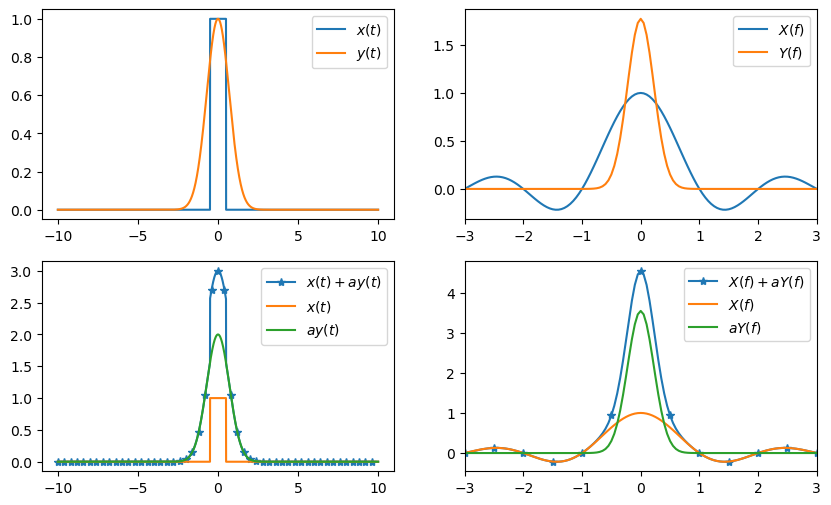

In [129]:
showLinearity(2)

# Time Shifting

In [152]:
x = rect
X = ft(x(t), Fs, -tstart)

def showShift(t0):
    plt.gcf().clear()
    
    plt.subplot(121)
    plt.plot(t, x(t), label='$x(t)$')
    plt.plot(t, x(t-t0), label='$x(t-t_0)$')
    plt.legend()
    

    plt.subplot(122)
    Xt0 = ft(x(t-t0), Fs, -tstart)
    plt.plot(f, X.real, label='Re $X(f)$')
    plt.plot(f, Xt0.real, label='Re $X_{t_0}(f)$')
    plt.plot(f, Xt0.imag, label='Im $X_{t_0}(f)$')
    plt.xlim(-3, 3)
    plt.ylim(-1.25, 1.25)
    plt.legend()

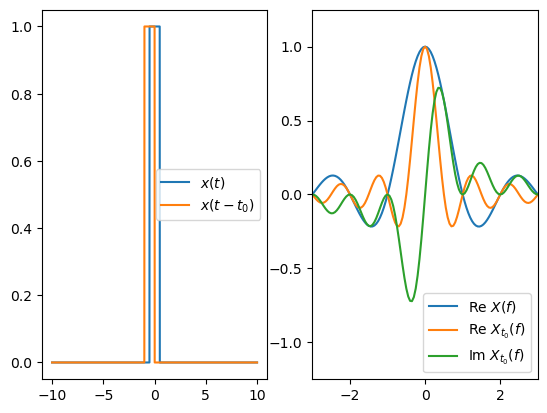

In [153]:
showShift(-.5)

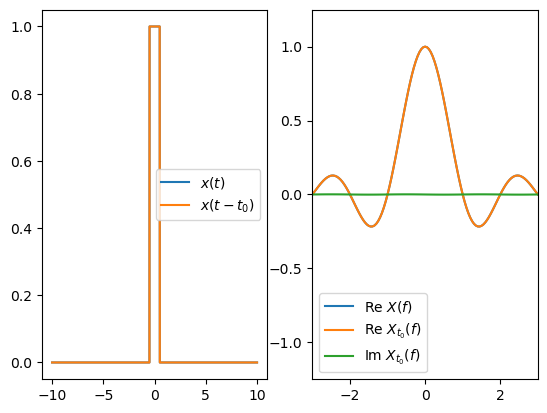

In [154]:
showShift(0)

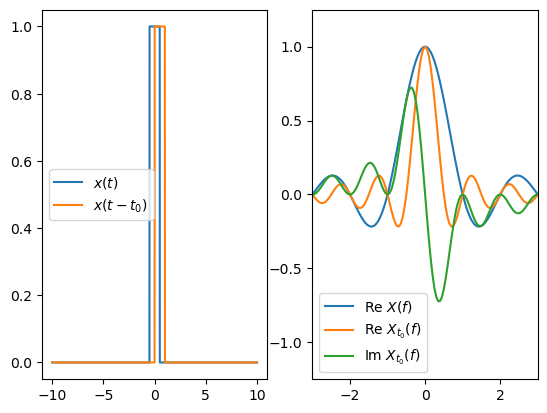

In [155]:
showShift(0.5)

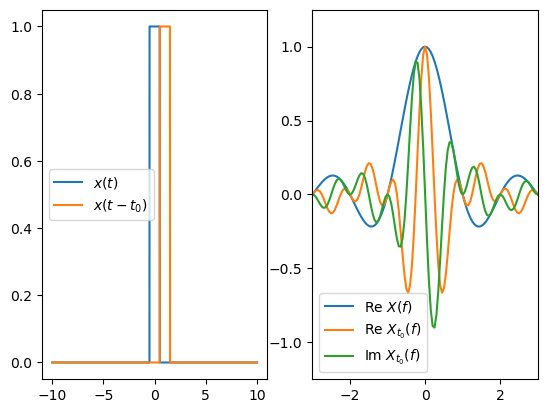

In [156]:
showShift(1)

# Convolution

Sources
1. Qingkai Kong, Timmy Siaw, Alexandre Bayen Python Programming and Numerical Methods
2. Maximilian Matthe DSP Illustrations